## Modelo KMeans 

### Importamos Librerias necesarias para tratar datos, realizar graficos y crear moelo Kmeans

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#librerias del modelo Kmeans
from sklearn.cluster import KMeans 
#Metricas para evalurar modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#libreria para evitar la advertencia 
# de que el modelo Kmeans tiene perdida de memoria en kindows
import warnings
from tabulate import tabulate

### Analisis Exploratorio de Datos

In [9]:
warnings.filterwarnings('ignore')

# Cargamos los datos en un dataframe
data= pd.read_csv('Mall_Customers.csv')
# Verificamos nombres y tipos de datos de las columnas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [11]:
# Observamos algunos registros
print(data.head(15))

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                 

In [13]:
# Verificamos valores nulos
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Observamos que hay una variable categorica 'Gender' que en algunos casos se deben modificar para que el modelo mejore el rendimiento, de igual forma se comprueba que no hay datos vacios o nulos

In [15]:
# Tratamos variables categoricas utilizando one-hot-encoding 
data=pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Observamos los primeros 15 registros después de hacer las modificaciones
print(data.head(15))

    CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0            1   19                  15                      39         True
1            2   21                  15                      81         True
2            3   20                  16                       6        False
3            4   23                  16                      77        False
4            5   31                  17                      40        False
5            6   22                  17                      76        False
6            7   35                  18                       6        False
7            8   23                  18                      94        False
8            9   64                  19                       3         True
9           10   30                  19                      72        False
10          11   67                  19                      14         True
11          12   35                  19                      99        False

### Verificar Datos Atipicos

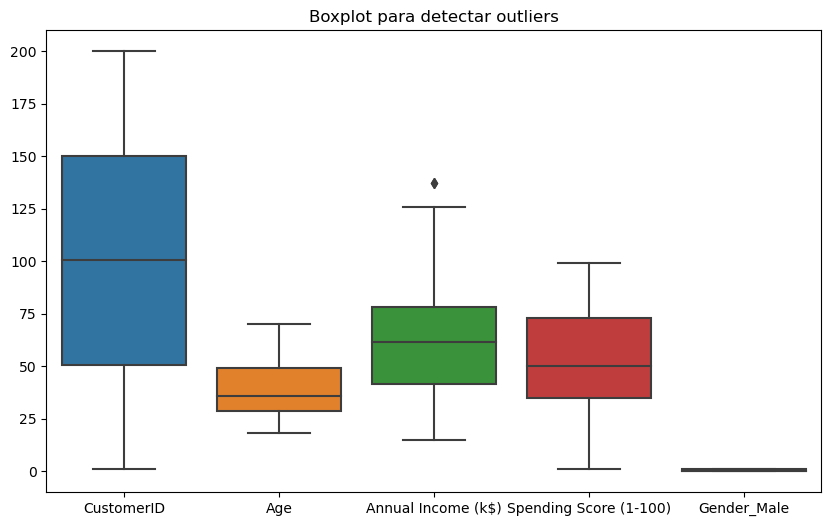

In [21]:
# Grafica para detectar datos atipicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot para detectar outliers')
plt.show()

Se ha tratado la varible categorica 'Gender', ahora se ha creado una nueva columna 'Gender_Male' que es de tipo booleano, respecto al gráfico, se puede observar que la variable 'Annual Income (k$)' presenta algunos datos atípicos, como la cantidad no es tan representativa no afectara el modelo

### Selecionar Mejores Características

In [23]:
# Seleccionar mejores caracteristicas
data= data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

# Imprimir seleccion de mejores caracteristicas
print(data.head(10))

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39         True
1   21                  15                      81         True
2   20                  16                       6        False
3   23                  16                      77        False
4   31                  17                      40        False
5   22                  17                      76        False
6   35                  18                       6        False
7   23                  18                      94        False
8   64                  19                       3         True
9   30                  19                      72        False


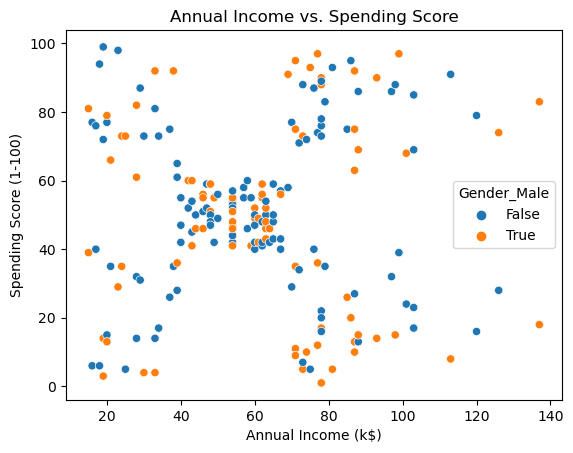

In [25]:
# Grafico antes del agrupamiento
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender_Male' )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

### Análisis:

Distribución general:
Los puntos están distribuidos en todo el rango de ingreso anual de 0 a 140k y de puntuación de gasto de 0 a 100.
Hay agrupaciones de puntos alrededor de ciertos niveles de ingreso y puntuación, lo que podría indicar la existencia de patrones o segmentos específicos de consumidores.

Diferencias de género:
Ambos géneros parecen estar presentes en todos los niveles de ingreso y puntuación de gasto, aunque podría haber áreas donde un género se concentre más que el otro.
No parece haber una diferencia clara en términos de ingresos anuales o puntuación de gasto que dependa del género.

Segmentación de clientes:
Se pueden observar posibles grupos en ciertas áreas del gráfico. Por ejemplo, algunos puntos se concentran alrededor de ingresos anuales de entre 60k-80k con puntuaciones de gasto tanto altas como bajas.
Hay un vacío notable en la parte superior izquierda (bajos ingresos y alta puntuación de gasto) y en la parte inferior derecha (altos ingresos y baja puntuación de gasto), lo que sugiere que es poco común que personas con bajos ingresos gasten mucho y viceversa.

### Gráfica de Codo

  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


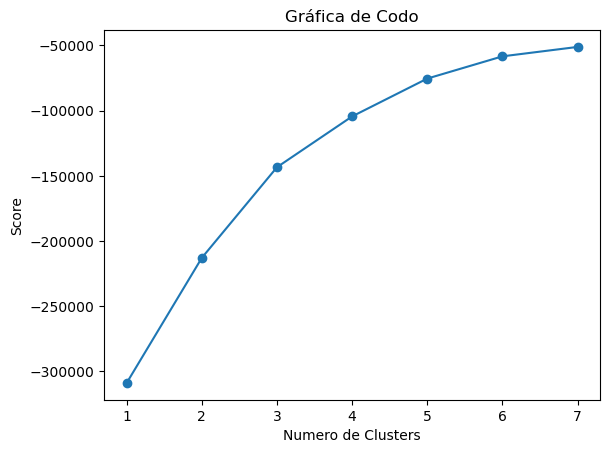

In [27]:
#Grafica para identificar valor de k
Nc = range(1, 8)
Kmeans=[KMeans(n_clusters=i) for i in Nc]
score=[Kmeans[i].fit(data).score(data) for i in range(len(Kmeans))]

# Grafica de Codo para determinar n_clusters
plt.plot(Nc, score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

### Interpretación del gráfico:

En este gráfico, el "codo" parece estar alrededor de 4 y 6 clusters. A partir de este punto, el beneficio de agregar más clusters disminuye significativamente. Esto sugiere que 4, 5 o 6 es un buen número de clusters para este conjunto de datos.
Aunque la inercia sigue disminuyendo al agregar más clusters, la reducción es menos significativa, lo que indica que los clusters adicionales no aportan mucho al modelo.

### Crear Modelo KMeans

In [29]:
#Generación del modelo de agrupamiento 
#con k=6 por un resultado mas optimo comparado con 4, y 5 clusters
model= KMeans(n_clusters=6, random_state=0)
model.fit(data)

#Se agrega la columna Group a data
model.labels_
data['Group']=model.labels_

# Verificamos numero del grupo para los datos
print(data.head(10))

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  Group
0   19                  15                      39         True      4
1   21                  15                      81         True      5
2   20                  16                       6        False      4
3   23                  16                      77        False      5
4   31                  17                      40        False      4
5   22                  17                      76        False      5
6   35                  18                       6        False      4
7   23                  18                      94        False      5
8   64                  19                       3         True      4
9   30                  19                      72        False      5


In [31]:
#Preparacion de la metrica del columna Group
observaciones=len(data)
x= data.drop('Group', axis=1)
clusters=data['Group']

# Desempeño del modelo con el Coeficiente de Silhouette 
# el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score
#Calcular las metricas
sil_score= silhouette_score(x, clusters)
cali_score= calinski_harabasz_score(x, clusters)
davi_score= davies_bouldin_score(x, clusters)


#Crear tabla para mostrar los valores de las metricas
table_data=[
    ['Numero Observaciones', observaciones],
    ['Coeficiente Silhoutte', sil_score],
    ['Indice Calinski Harabasz', cali_score],
    ['Indice Davies Bouldin', davi_score]
]

### Obener Resultados de las Metricas

In [33]:
#Imprimir la tabla
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
|   Numero Observaciones   |         200         |
|  Coeficiente Silhoutte   | 0.45205475380756527 |
| Indice Calinski Harabasz | 166.58349562213596  |
|  Indice Davies Bouldin   |  0.747521582092153  |
+--------------------------+---------------------+


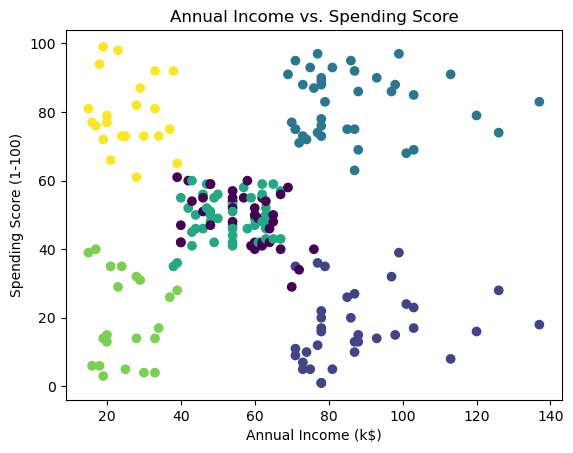

In [35]:
# Realizar las diferentes gráficas 
# para visualizar los resultados del modelo
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Group'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

### Analisis de Resultados

#### Coeficiente de Silhouette:

Valor: 0.452
Interpretación: El coeficiente de Silhouette mide qué tan bien se separan los clusters entre sí y qué tan similares son los puntos dentro de un mismo cluster. Sus valores oscilan entre -1 y 1:
Valores cercanos a 1 indican que los puntos están bien agrupados y separados de otros clusters.
Valores cercanos a 0 sugieren que los puntos están en el límite de dos clusters.
Valores negativos indican que los puntos podrían estar en el cluster incorrecto.

Análisis: Un valor de 0.452 es moderado, lo que sugiere que los clusters están razonablemente separados y los puntos están relativamente bien agrupados. Sin embargo, podría haber espacio para mejorar la definición de los clusters.

#### Indice de Calinski-Harabasz:

Valor: 166.58
Interpretación: Este índice evalúa la dispersión de los clusters; un valor más alto indica una mejor separación y compacidad de los clusters. No tiene un rango fijo, pero los valores más altos son mejores.

Análisis: Un valor de 166.58 indica que los clusters tienen una separación y compactación decente, pero la interpretación exacta depende del contexto y de los valores observados en otros modelos o iteraciones.

#### Indice de Davies-Bouldin:

Valor: 0.748
Interpretación: Este índice mide la calidad del clustering en función de la dispersión dentro de los clusters y la distancia entre ellos. Los valores oscilan entre 0 y un número positivo, y un valor más bajo es mejor, indicando que los clusters son compactos y bien separados.

Análisis: Un valor de 0.748 es relativamente bajo, lo cual sugiere que los clusters están razonablemente bien separados, pero no son perfectos. Idealmente, este índice debería ser lo más cercano a 0 posible.

#### Análisis del Gráfico:
El gráfico muestra la segmentación en múltiples clusters, cada uno representado por un color diferente. Estos clusters indican grupos de observaciones que comparten características similares basadas en las dos variables analizadas.
En este caso, se pueden observar 6 clusters principales:

Un grupo en la parte inferior izquierda con ingresos bajos y puntuaciones de gasto bajas (probablemente clientes con poco poder adquisitivo y un gasto moderado o bajo).

Un grupo en la parte superior izquierda con ingresos bajos y puntuaciones de gasto altas (clientes que gastan mucho a pesar de tener ingresos bajos).

Un grupo central que incluye clientes con ingresos medios y diferentes niveles de puntuación de gasto.

Un grupo en la parte inferior derecha con ingresos altos y puntuaciones de gasto bajas (clientes con altos ingresos pero que gastan menos).

Un grupo en la parte superior derecha con altos ingresos y puntuaciones de gasto altas (clientes con alto poder adquisitivo y que también gastan mucho).